# **LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **READ DATA**

In [2]:
data = pd.read_excel("https://github.com/serlysetyani/fuzzyLogic/blob/main/restoran.xlsx?raw=true")
data

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


# **MEMBERSHIP**



*   MEMBERSHIP MAKANAN



In [3]:
def poorFood(f):
    poorFood, notpoorFood = 4, 6

    if f <= poorFood:
        return 1
    elif f > notpoorFood:
        return 0
    elif f > poorFood and f <= notpoorFood:
        return ((notpoorFood - f) / (notpoorFood - poorFood))


def goodFood(f):
    notgoodFood1, goodFood1, goodFood2, notgoodFood2 = 4, 6, 7, 9

    if f > goodFood1 and f <= goodFood2:
        return 1
    elif f <= notgoodFood1 or f > notgoodFood2:
        return 0
    elif f > notgoodFood1 and f <= goodFood1:
        return ((f - notgoodFood1) / (goodFood1 - notgoodFood1))
    elif f > goodFood2 and f <= notgoodFood2:
        return ((notgoodFood2 - f) / (notgoodFood2 - goodFood2))


def excellentFood(f):
    notexcellentFood, excellentFood = 6, 8

    if f > excellentFood:
        return 1
    elif f <= notexcellentFood:
        return 0
    elif f > notexcellentFood and f <= excellentFood:
        return ((f - notexcellentFood) / (excellentFood - notexcellentFood))


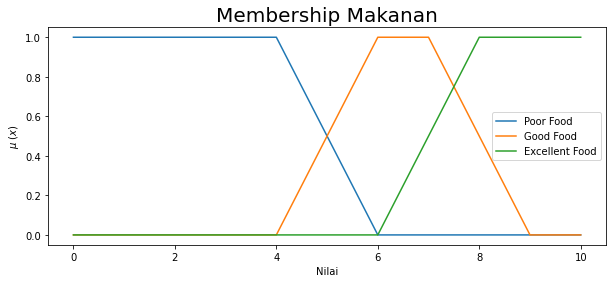

In [4]:
# plot grafik membership makanan

x = [i for i in range(11)]

ypoorF = [poorFood(i) for i in x]
ygoodF = [goodFood(i) for i in x]
yexcellentF = [excellentFood(i) for i in x]

plt.figure(figsize=(10,4))
plt.title('Membership Makanan',fontsize = 20) 
plt.plot(x, ypoorF, label = 'Poor Food')
plt.plot(x, ygoodF, label = 'Good Food')
plt.plot(x, yexcellentF, label = 'Excellent Food')
plt.xlabel('Nilai')
plt.ylabel(r'$\mu\ (x)$')
plt.legend()

*   MEMBERSHIP PELAYANAN



In [5]:
def PoorService(x):
  poorService = 50
  notpoorService = 67

  if x <= poorService:
    return 1;
  elif x > notpoorService:
    return 0
  elif x > poorService and x <= notpoorService:
    return (notpoorService - x) / (notpoorService - poorService)

def GoodService(x):
  notgoodService1 = 50
  goodService1 = 60
  goodService2 = 70
  notgoodService2 = 85

  if x > goodService1 and x <= goodService2:
    return 1
  elif x <= notgoodService1 or x > notgoodService2:
    return 0
  elif x > notgoodService1 and x <= goodService1:
    return (x - notgoodService1) / (goodService1 - notgoodService1)
  elif x > goodService2 and x <= notgoodService2:
    return (notgoodService2 - x) / (notgoodService2 - goodService2)

def ExcellentService(x):
  notexcellentService = 75
  excellentService = 80

  if x > excellentService:
    return 1
  elif x <= notexcellentService:
    return 0
  elif x > notexcellentService and x <= excellentService:
    return (x - notexcellentService) / (excellentService - notexcellentService)

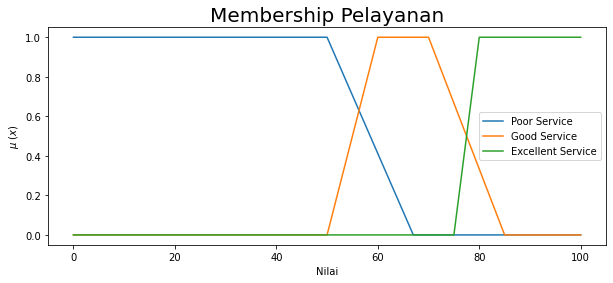

In [6]:
# plot grafik membership pelayanan

x = [i for i in range(101)]

ypoorS = [PoorService(i) for i in x]
ygoodS = [GoodService(i) for i in x]
yexcellentS = [ExcellentService(i) for i in x]

plt.figure(figsize=(10,4))
plt.title('Membership Pelayanan',fontsize = 20) 
plt.plot(x, ypoorS, label = 'Poor Service')
plt.plot(x, ygoodS, label = 'Good Service')
plt.plot(x, yexcellentS, label = 'Excellent Service')
plt.xlabel('Nilai')
plt.ylabel(r'$\mu\ (x)$')
plt.legend()

# **FUZZIFICATION**

In [7]:
def fuzzificationFood(foodValue):
  foodSet = []
  foodSet.append(poorFood(foodValue))
  foodSet.append(goodFood(foodValue))
  foodSet.append(excellentFood(foodValue))
  return foodSet

def fuzzificationService(serviceValue):
  serviceSet = []
  serviceSet.append(PoorService(serviceValue))
  serviceSet.append(GoodService(serviceValue))
  serviceSet.append(ExcellentService(serviceValue))
  return serviceSet


# **INFERENCE**

In [8]:
def inference(serviceSet, foodSet):
  inferenceSet = []
  recommendedSet, moderatelySet, notRecommendedSet = [], [], []

  recommendedSet.append(min(foodSet[2], serviceSet[2]))
  recommendedSet.append(min(foodSet[2], serviceSet[1]))
  recommendedSet.append(min(foodSet[1], serviceSet[2]))
  

  moderatelySet.append(min(foodSet[1], serviceSet[1]))
  moderatelySet.append(min(foodSet[2], serviceSet[0]))

  notRecommendedSet.append(min(foodSet[0], serviceSet[0]))
  notRecommendedSet.append(min(foodSet[1], serviceSet[0]))
  notRecommendedSet.append(min(foodSet[0], serviceSet[1]))
  notRecommendedSet.append(min(foodSet[0], serviceSet[2]))

  inferenceSet.append(max(recommendedSet))
  inferenceSet.append(max(moderatelySet))
  inferenceSet.append(max(notRecommendedSet))
  
  return inferenceSet

# **DEFUZZIFICATION**

In [9]:
def defuzzification(inferenceSet):
  multiplier = (inferenceSet[0]*100) + (inferenceSet[1]*80) + (inferenceSet[2]*50) 
  divider = inferenceSet[0] + inferenceSet[1] + inferenceSet[2]
  return multiplier/divider

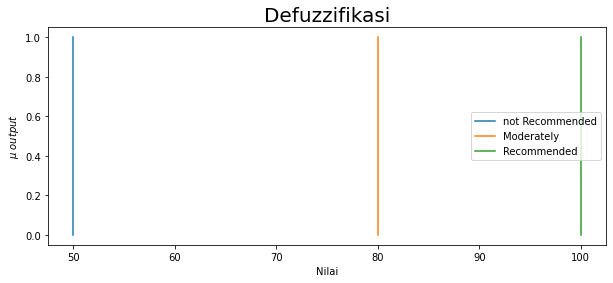

In [10]:
xnotRecommended = [50,50]
xmoderately = [80,80]
xRecommended = [100,100]

y = [0,1]

plt.figure(figsize=(10,4))
plt.title('Defuzzifikasi',fontsize = 20)
plt.plot(xnotRecommended,y,label='not Recommended')
plt.plot(xmoderately,y,label='Moderately')
plt.plot(xRecommended,y,label='Recommended')
plt.xlabel('Nilai')
plt.ylabel(r'$\mu\ output$')
plt.legend()

# **MAIN PROGRAM**





In [11]:
hasilAkhir = []
for row in range(100):
  fuzziPelayanan = fuzzificationService(data['pelayanan'][row])
  fuzziMakanan = fuzzificationFood(data['makanan'][row])
  inferensi = inference(fuzziPelayanan,fuzziMakanan)
  hasilAkhir.extend([defuzzification(inferensi)])
 
data['hasil'] = hasilAkhir
data = data.sort_values(by='hasil', ascending=False)[:10]
data['id'].to_excel('peringkat.xls', index=False, header=False)

data

<ipython-input-11-c5dafaefbd58>:10: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data['id'].to_excel('peringkat.xls', index=False, header=False)


,id,pelayanan,makanan,hasil
41,42,94,10,100.000000
23,24,100,9,100.000000
30,31,74,9,100.000000
21,22,79,9,100.000000
78,79,87,9,100.000000
68,69,86,10,100.000000
53,54,64,10,97.000000
15,16,82,6,96.666667
24,25,61,10,94.782609
82,83,69,8,93.333333
